## Aplicación de Python con el Dataset
### Primero, se importan las librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

### Guardar el Dataset dentro de una variable:

In [2]:
df = pd.read_csv("Change criteria hypertension peru.csv")
df

,id,city,masl,sex,age_years,systolic_bp,diastolic_bp,weight_kg,height_cm,body_mass_index,...,physical_activity,msnm,region,sist_old,diast_old,sist_new,diast_new,treatment,HTA_new,BMI_cat
0,3574,Huancayo,3250,Female,23,119,74,58.0,163.0,22.0,...,Yes,2-4mil msnm,Mountain,Optma,Optma,Normal,Norm/elev,No,No,Normal
1,1092,Loreto,100,Male,60,110,70,54.0,160.0,21.0,...,No,<2000msm,Jungle,Optma,Optma,Normal,Norm/elev,No,No,Normal
2,861,Lima,500,Female,38,120,80,65.0,163.0,25.0,...,Yes,<2000msm,Coast,Optma,Normal,Normal,HTA 1,No,Yes,Normal
3,835,Lima,500,Female,43,110,80,60.0,157.0,24.0,...,No,<2000msm,Coast,Optma,Normal,Normal,HTA 1,No,Yes,Normal
4,4654,Huanuco,1900,Female,30,95,60,50.0,152.0,22.0,...,Yes,<2000msm,Mountain,Optma,Optma,Normal,Norm/elev,No,No,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,5490,Puno,3800,Male,25,80,60,NaN,NaN,NaN,...,Yes,2-4mil msnm,Mountain,Optma,Optma,Normal,Norm/elev,No,No,NaN
5611,4731,Puno,3800,Female,55,105,63,NaN,NaN,NaN,...,Yes,2-4mil msnm,Mountain,Optma,Optma,Normal,Norm/elev,No,No,NaN
5612,4715,Puno,3800,Male,46,123,85,NaN,NaN,NaN,...,No,2-4mil msnm,Mountain,Normal,Normal/alta,Elevado,HTA 1,No,Yes,NaN
5613,4750,Puno,3800,Male,24,115,65,NaN,NaN,NaN,...,No,2-4mil msnm,Mountain,Optma,Optma,Normal,Norm/elev,No,No,NaN


### Análisis y limpieza de datos
#### Se encontrarán las nans.

In [3]:
df.isna().sum()

id                           0
city                         0
masl                         0
sex                          0
age_years                    0
systolic_bp                  0
diastolic_bp                 0
weight_kg                  197
height_cm                  201
body_mass_index            211
diabetes_mellitus           18
dm_treatment                44
cv_diseases                 28
cd_treatment                25
smoking                    132
smoking_years             5129
hypertension_dx              0
hypertension_years        4814
hypertension_treatment    4783
physical_activity            0
msnm                         0
region                       0
sist_old                     0
diast_old                    0
sist_new                     0
diast_new                    0
treatment                    0
HTA_new                      0
BMI_cat                    211
dtype: int64

Aquí se van a cambiar algunos datos, debido a que se muestran muchos `NaN`, pero no es poque se hayan dejado estos espacios en blanco como dato incompleto, sino que, por ejemplo, en la variable de smoking_years hay personas que no han fumado en ningún momento de la vida, por lo que se dejaron espacios vacíos en lugar de poner el valor de cero. Se cambiarán los datos de algunas columnas.

In [4]:
df_1 = df
df_1['hypertension_years'] = df['hypertension_years'].fillna(0)
df_1['smoking_years'] = df['smoking_years'].fillna(0)
df_1['hypertension_treatment'] = df['hypertension_treatment'].fillna("N/A")

In [5]:
df_1.isna().sum()

id                          0
city                        0
masl                        0
sex                         0
age_years                   0
systolic_bp                 0
diastolic_bp                0
weight_kg                 197
height_cm                 201
body_mass_index           211
diabetes_mellitus          18
dm_treatment               44
cv_diseases                28
cd_treatment               25
smoking                   132
smoking_years               0
hypertension_dx             0
hypertension_years          0
hypertension_treatment      0
physical_activity           0
msnm                        0
region                      0
sist_old                    0
diast_old                   0
sist_new                    0
diast_new                   0
treatment                   0
HTA_new                     0
BMI_cat                   211
dtype: int64

Dentro de las filas que contienen `NaN's` se eliminarán las columnas donde alguna de sus variables tienen al menos un `NaN'

In [6]:
df_2 = df_1.dropna(subset=['weight_kg', 'height_cm', 'diabetes_mellitus', 'dm_treatment', 'cv_diseases', 'cd_treatment', 'smoking', 'BMI_cat'])

In [7]:
df_2.isna().sum()

id                        0
city                      0
masl                      0
sex                       0
age_years                 0
systolic_bp               0
diastolic_bp              0
weight_kg                 0
height_cm                 0
body_mass_index           0
diabetes_mellitus         0
dm_treatment              0
cv_diseases               0
cd_treatment              0
smoking                   0
smoking_years             0
hypertension_dx           0
hypertension_years        0
hypertension_treatment    0
physical_activity         0
msnm                      0
region                    0
sist_old                  0
diast_old                 0
sist_new                  0
diast_new                 0
treatment                 0
HTA_new                   0
BMI_cat                   0
dtype: int64

In [8]:
print('Número de columnas eliminadas: {}'.format(len(df) - len(df_2)))

Número de columnas eliminadas: 368


Se transformarán las filas de `smoking_years` y `hypertension_years` de tipo Int

In [9]:
df_2['smoking_years'].astype(int)
df_2['hypertension_years'].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
5399    0
5400    1
5401    0
5402    0
5403    0
Name: hypertension_years, Length: 5247, dtype: int32

La cantidad de columnas eliminadas es de 368, por lo que nos quedamos con un total de 5247 datos.
Dentro de la columna msnm (metros sobre el nivel del mar) se cambiará el formato de los datos, pues se puede observar que en algunos se tiene `2-4 mil msnm` y en otros está como `<2000msm` y `>4000 msnm`. Para empezar ya se sabe que es la columna de msnm entonces está demás ponerlo dentro de la casilla, esto se va a eliminar; y otro punto es el elegir si se quedan los datos de los números como `2 mil` o `2000`, por el momento se quedará como 2 mil.

In [10]:
#df_3 = df_2['msnm'].replace('2-4mil msnm','2-4 mil')
#df_3 = df_3['msnm'].replace('<2000msm','< 2 mil')
#df_3 = df_3['msnm'].replace('>4000 msnm','> 4 mil')
df_3 = df_2.replace({'msnm': {'2-4mil msnm': '2-4 mil', '<2000msm': '< 2 mil', '>4000 msnm': '> 4 mil'}})
df_3['msnm']

0       2-4 mil
1       < 2 mil
2       < 2 mil
3       < 2 mil
4       < 2 mil
         ...   
5399    2-4 mil
5400    < 2 mil
5401    < 2 mil
5402    2-4 mil
5403    > 4 mil
Name: msnm, Length: 5247, dtype: object

También en las columnas de las presiones arteriales sistólicas y diastólicas nuevas y antiguas varían mucho los datos:
<ul>
    <li>En la columna sist_old y diast_old se encuentra una palabra que está como `Optma`, se reemplazará por `Optima`.</li>
    <li>En la columna diast_new se encuentra un dato en muchas filas, este es `Norm/elev` mientras que en sist_old y diast_old está como `Normal/alta` entonces se cambiará de `Norm/elev` a `Normal/alta` para tener un mismo formato.</li>
</ul>

In [11]:
df_4 = df_3.replace({'sist_old': {'Optma': 'Optima'}, 'diast_old': {'Optma': 'Optima'}, 'diast_new': {'Norm/elev': 'Normal/alta'}})
df_4[['sist_old','diast_old','diast_new']]

,sist_old,diast_old,diast_new
0,Optima,Optima,Normal/alta
1,Optima,Optima,Normal/alta
2,Optima,Normal,HTA 1
3,Optima,Normal,HTA 1
4,Optima,Optima,Normal/alta
...,...,...,...
5399,Normal/alta,HTA 1,HTA 2
5400,HTA 2,HTA 2,HTA 2
5401,Optima,Optima,Normal/alta
5402,HTA 1,HTA 1,HTA 2


La última columna, `BMI_cat`, se muestra catalogado el índice de masa corporal, pero analizando esta columna con los valores de la columna `body_mass_index` no están bien catalogadas, aparte que los datos dentro de la columna `body_mass_index` están redondeados, entonces se van a calcular de nuevo cada uno de estos valores y después se realizará la correción en `BMI_cat`.

In [12]:
def bmi_change(df):
    if df['body_mass_index'] < 18.5:
        return 'Bajo peso'
    elif 18.5 <= df['body_mass_index'] < 25.0:
        return 'Normal'
    elif 25.0 <= df['body_mass_index'] < 30.0:
        return 'Sobrepeso'
    elif 30.0 <= df['body_mass_index'] < 35.0:
        return 'Obeso clase 1'
    elif 35.0 <= df['body_mass_index'] < 40.0:       
        return 'Obeso clase 2'
    elif 40.0 <= df['body_mass_index']:
        return 'Obeso clase 3'

In [13]:
df_4['body_mass_index'] = round(df_4['weight_kg'] / ((df_4['height_cm'] / 100) ** 2), 2)
df_4['BMI_cat'] = df_4.apply(bmi_change, axis = 1)
df_4

,id,city,masl,sex,age_years,systolic_bp,diastolic_bp,weight_kg,height_cm,body_mass_index,...,physical_activity,msnm,region,sist_old,diast_old,sist_new,diast_new,treatment,HTA_new,BMI_cat
0,3574,Huancayo,3250,Female,23,119,74,58.0,163.0,21.83,...,Yes,2-4 mil,Mountain,Optima,Optima,Normal,Normal/alta,No,No,Normal
1,1092,Loreto,100,Male,60,110,70,54.0,160.0,21.09,...,No,< 2 mil,Jungle,Optima,Optima,Normal,Normal/alta,No,No,Normal
2,861,Lima,500,Female,38,120,80,65.0,163.0,24.46,...,Yes,< 2 mil,Coast,Optima,Normal,Normal,HTA 1,No,Yes,Normal
3,835,Lima,500,Female,43,110,80,60.0,157.0,24.34,...,No,< 2 mil,Coast,Optima,Normal,Normal,HTA 1,No,Yes,Normal
4,4654,Huanuco,1900,Female,30,95,60,50.0,152.0,21.64,...,Yes,< 2 mil,Mountain,Optima,Optima,Normal,Normal/alta,No,No,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,1528,Cajamarca,2750,Female,49,135,90,77.0,147.0,35.63,...,Yes,2-4 mil,Mountain,Normal/alta,HTA 1,HTA 1,HTA 2,No,No,Obeso clase 2
5400,1038,Loreto,100,Male,49,164,105,101.0,165.0,37.10,...,Yes,< 2 mil,Jungle,HTA 2,HTA 2,HTA 2,HTA 2,No,No,Obeso clase 2
5401,298,Piura-Chiclayo,30,Male,47,104,58,67.0,141.0,33.70,...,No,< 2 mil,Coast,Optima,Optima,Normal,Normal/alta,No,No,Obeso clase 1
5402,2752,Cusco,3350,Female,49,140,95,91.0,165.0,33.43,...,No,2-4 mil,Mountain,HTA 1,HTA 1,HTA 2,HTA 2,No,No,Obeso clase 1


Por último se cambiará el index del DataFrame con los id de cada paciente.

In [14]:
df_4 = df_4.set_index('id')

In [15]:
df_4.groupby('hypertension_dx').size()

hypertension_dx
.       119
No     4374
Yes     754
dtype: int64

In [16]:
df_5 = df_4[df_4.hypertension_dx != '.']
df_5.groupby('hypertension_dx').size()

hypertension_dx
No     4374
Yes     754
dtype: int64

Ahora que ya se tienen limpios los datos, se guardará el DataFrame en un archivo nuevo, se nombrará como `hypertension_peru_clean.csv`

In [80]:
# fumador = lambda smoking: True if smoking == "Yes" elif smoking == "No" False
# diabetico = lambda diabe]tes_mellitus:  True if diabetes_mellitus == "Yes" elif diabetes_mellitus == "No" False
df_5 = df_5.sort_values(by=['id'])
df_6 = df_5.replace({'HTA_new': {'Yes': 'Si'}, 'treatment': {'Yes': 'Si'}, 'physical_activity': {'Yes': 'Si'}, 'hypertension_treatment': {'Yes': 'Si'}, 'hypertension_dx': {'Yes': 'Si'}, 'smoking': {'Yes': 'Si'}, 'cd_treatment': {'Yes': 'Si'}, 'cv_diseases': {'Yes': 'Si'}, 'dm_treatment': {'Yes': 'Si'}, 'diabetes_mellitus': {'Yes': 'Si'}, 'sex':{'Female':'Mujer', 'Male':'Hombre'}})
df_6.to_csv("hypertension_peru_clean.csv")

In [81]:
df_6.dtypes

city                       object
masl                        int64
sex                        object
age_years                   int64
systolic_bp                 int64
diastolic_bp                int64
weight_kg                 float64
height_cm                 float64
body_mass_index           float64
diabetes_mellitus          object
dm_treatment               object
cv_diseases                object
cd_treatment               object
smoking                    object
smoking_years             float64
hypertension_dx            object
hypertension_years        float64
hypertension_treatment     object
physical_activity          object
msnm                       object
region                     object
sist_old                   object
diast_old                  object
sist_new                   object
diast_new                  object
treatment                  object
HTA_new                    object
BMI_cat                    object
dtype: object

In [82]:
mayor_igual_a_30 = df_6['age_years'] >= 30
df_6[mayor_igual_a_30]

,city,masl,sex,age_years,systolic_bp,diastolic_bp,weight_kg,height_cm,body_mass_index,diabetes_mellitus,...,physical_activity,msnm,region,sist_old,diast_old,sist_new,diast_new,treatment,HTA_new,BMI_cat
id,,,,,,,,,,,,,,,,,,,,,
1,Piura-Chiclayo,4,Mujer,84,135,58,50.0,140.0,25.51,No,...,No,< 2 mil,Coast,Normal/alta,Optima,HTA 1,Normal/alta,Si,Si,Sobrepeso
4,Piura-Chiclayo,4,Hombre,63,123,75,65.0,157.0,26.37,No,...,Si,< 2 mil,Coast,Normal,Optima,Elevado,Normal/alta,No,No,Sobrepeso
6,Piura-Chiclayo,4,Hombre,83,155,85,59.0,149.0,26.58,No,...,No,< 2 mil,Coast,HTA 1,Normal/alta,HTA 2,HTA 1,Si,No,Sobrepeso
7,Piura-Chiclayo,4,Hombre,84,135,55,69.0,150.0,30.67,No,...,No,< 2 mil,Coast,Normal/alta,Optima,HTA 1,Normal/alta,Si,Si,Obeso clase 1
8,Piura-Chiclayo,4,Hombre,76,158,83,76.0,165.0,27.92,No,...,No,< 2 mil,Coast,HTA 1,Normal,HTA 2,HTA 1,No,No,Sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5613,Rinconada,5100,Mujer,43,88,65,70.0,150.0,31.11,No,...,No,> 4 mil,Mountain,Optima,Optima,Normal,Normal/alta,No,No,Obeso clase 1
5614,Rinconada,5100,Hombre,49,110,80,68.0,157.0,27.59,No,...,No,> 4 mil,Mountain,Optima,Normal,Normal,HTA 1,No,Si,Sobrepeso
5615,Rinconada,5100,Hombre,30,120,80,81.0,167.0,29.04,No,...,No,> 4 mil,Mountain,Optima,Normal,Normal,HTA 1,No,Si,Sobrepeso


In [83]:
# Cantidad de pacientes que se les diagnosticó recientemente hipertensión arterial
antiguos_no_HTA = df_6['hypertension_dx'] == 'No'
recien_HTA = df_6['HTA_new'] == 'Si'
len(df_6[recien_HTA & antiguos_no_HTA][{'diast_new', 'sist_new'}])

1047

In [84]:
# Cantidad de pacientes que fuman, son diabéticos, tienen sobrepeso o más y tienen hipertensión arterial
antiguos_yes_HTA = df_6['hypertension_dx'] == 'Si'
mayor_normal_BMI = df_6['body_mass_index'] >= 25.0
diabetico = df_6['diabetes_mellitus'] == 'Si'
fumador = df_6['smoking'] == 'Si'

len(df_6[recien_HTA & mayor_normal_BMI & diabetico & fumador])

11

In [85]:
# Pacientes que anteriormente tuvieron hipertensión pero ahora su diagnóstico sale negativo
recien_no_HTA = df_6['HTA_new'] == 'No'
df_6[recien_no_HTA & antiguos_yes_HTA]

,city,masl,sex,age_years,systolic_bp,diastolic_bp,weight_kg,height_cm,body_mass_index,diabetes_mellitus,...,physical_activity,msnm,region,sist_old,diast_old,sist_new,diast_new,treatment,HTA_new,BMI_cat
id,,,,,,,,,,,,,,,,,,,,,
6,Piura-Chiclayo,4,Hombre,83,155,85,59.0,149.0,26.58,No,...,No,< 2 mil,Coast,HTA 1,Normal/alta,HTA 2,HTA 1,Si,No,Sobrepeso
11,Piura-Chiclayo,4,Mujer,48,125,50,53.0,145.0,25.21,No,...,No,< 2 mil,Coast,Normal,Optima,Elevado,Normal/alta,Si,No,Sobrepeso
12,Piura-Chiclayo,4,Hombre,77,140,85,62.0,158.0,24.84,No,...,No,< 2 mil,Coast,HTA 1,Normal/alta,HTA 2,HTA 1,Si,No,Normal
16,Piura-Chiclayo,4,Mujer,36,128,78,74.0,160.0,28.91,No,...,Si,< 2 mil,Coast,Normal,Optima,Elevado,Normal/alta,Si,No,Sobrepeso
21,Piura-Chiclayo,4,Mujer,65,138,93,57.0,150.0,25.33,No,...,No,< 2 mil,Coast,Normal/alta,HTA 1,HTA 1,HTA 2,Si,No,Sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,Rinconada,5100,Hombre,59,135,90,89.0,140.0,45.41,No,...,No,> 4 mil,Mountain,Normal/alta,HTA 1,HTA 1,HTA 2,No,No,Obeso clase 3
5610,Rinconada,5100,Hombre,61,135,95,74.0,164.0,27.51,No,...,No,> 4 mil,Mountain,Normal/alta,HTA 1,HTA 1,HTA 2,No,No,Sobrepeso
5613,Rinconada,5100,Mujer,43,88,65,70.0,150.0,31.11,No,...,No,> 4 mil,Mountain,Optima,Optima,Normal,Normal/alta,No,No,Obeso clase 1


In [86]:
# Pacientes recien diagnosticados con hipertensión que ya tienen tratamiento y realizan ejercicio
treatment_new_yes = df_6['treatment'] == 'Si'
physical_activity_yes = df_6['physical_activity'] == 'Si'
df_6[recien_HTA & treatment_new_yes & physical_activity_yes]

,city,masl,sex,age_years,systolic_bp,diastolic_bp,weight_kg,height_cm,body_mass_index,diabetes_mellitus,...,physical_activity,msnm,region,sist_old,diast_old,sist_new,diast_new,treatment,HTA_new,BMI_cat
id,,,,,,,,,,,,,,,,,,,,,
408,Lima,500,Hombre,44,138,70,80.0,160.0,31.25,No,...,Si,< 2 mil,Coast,Normal/alta,Optima,HTA 1,Normal/alta,Si,Si,Obeso clase 1
844,Lima,500,Mujer,64,115,80,54.0,154.0,22.77,No,...,Si,< 2 mil,Coast,Optima,Normal,Normal,HTA 1,Si,Si,Normal
936,Lima,500,Mujer,61,130,70,64.0,161.0,24.69,No,...,Si,< 2 mil,Coast,Normal/alta,Optima,HTA 1,Normal/alta,Si,Si,Normal
1032,Loreto,100,Hombre,67,128,80,80.0,155.0,33.30,Si,...,Si,< 2 mil,Jungle,Normal,Normal,Elevado,HTA 1,Si,Si,Obeso clase 1
1301,Cajamarca,2750,Mujer,68,135,75,64.0,155.0,26.64,No,...,Si,2-4 mil,Mountain,Normal/alta,Optima,HTA 1,Normal/alta,Si,Si,Sobrepeso
2406,Cerro de Pasco,4350,Hombre,66,137,85,59.0,160.0,23.05,No,...,Si,> 4 mil,Mountain,Normal/alta,Normal/alta,HTA 1,HTA 1,Si,Si,Normal
2661,Cusco,3350,Mujer,54,120,80,110.0,155.0,45.79,No,...,Si,2-4 mil,Mountain,Optima,Normal,Normal,HTA 1,Si,Si,Obeso clase 3
2691,Cusco,3350,Mujer,70,120,80,67.0,164.0,24.91,No,...,Si,2-4 mil,Mountain,Optima,Normal,Normal,HTA 1,Si,Si,Normal
3471,Huancayo,3250,Hombre,72,135,80,80.0,167.0,28.69,No,...,Si,2-4 mil,Mountain,Normal/alta,Normal,HTA 1,HTA 1,Si,Si,Sobrepeso


https://zenodo.org/record/4567767#.Yj9dpzWjlEY

## Consultas importantes del dataset

In [87]:
nuevos_positivos_HTA = df_6['HTA_new'] == 'Si'
con_problemasCV = df_6['cv_diseases'] == 'Si'

value_counts_all = df_6['HTA_new'].value_counts()
value_counts_all_total = value_counts_all['No'] + value_counts_all['Si']

porcentajePersonas_HTA_siTotales = value_counts_all['No'] * 100 / value_counts_all_total

print(f'El {porcentajePersonas_HTA_siTotales:.0f}% de las personas registradas dentro del dataset tienen hipertensión')

personasCn_problemasCV = df_6[con_problemasCV]
df_ball = personasCn_problemasCV[personasCn_problemasCV['HTA_new'].isin(['Si', 'No'])]
value_counts_all = df_ball['HTA_new'].value_counts()
personas_total_CV = value_counts_all[0] + value_counts_all[1]
porcentaje_CV_y_HTA = value_counts_all[1] * 100 / personas_total_CV
print(f'El {porcentaje_CV_y_HTA:.0f}% de las personas que tienen problemas cardiovasculares padecen de hipertensión')


#print(porcentaje_CV_y_HTA)

El 75% de las personas registradas dentro del dataset tienen hipertensión
El 30% de las personas que tienen problemas cardiovasculares padecen de hipertensión


In [88]:
# La presión arterial aumenta con la edad y, por lo tanto, el riesgo de que una persona sea hipertensa aumenta en las personas mayores de 65 años
mayor_igual_a_65 = df_6['age_years'] >= 65
df_mayores_o_65 =df_6[mayor_igual_a_65]

No    497
Si    198
Name: HTA_new, dtype: int64
El 28% de las personas que tienen más de 65 años tienen hipertensión


H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


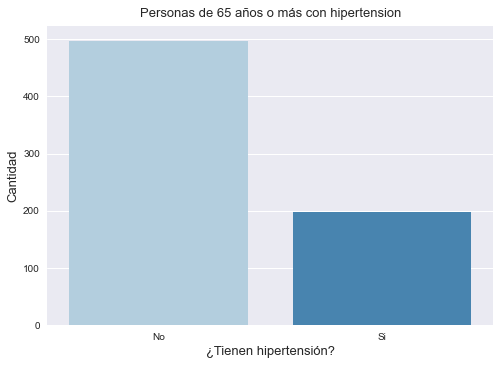

In [89]:
df_ball = df_mayores_o_65[df_mayores_o_65['HTA_new'].isin(['Si', 'No'])]
value_counts_all = df_ball['HTA_new'].value_counts()

value_counts_all

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('Cantidad', fontsize=13)
ax.set_xlabel('¿Tienen hipertensión?', fontsize=13)
ax.set_title('Personas de 65 años o más con hipertension', fontsize=13, pad=10);

personas_con_hipertension_MayorIgual65 = df_ball['HTA_new'].value_counts()

total_personas64mas_hipertension = personas_con_hipertension_MayorIgual65[0] + personas_con_hipertension_MayorIgual65[1]

porcentaje_conHipertension_personas64mas = personas_con_hipertension_MayorIgual65[1] * 100 / total_personas64mas_hipertension

print(personas_con_hipertension_MayorIgual65)

print(f'El {porcentaje_conHipertension_personas64mas:.0f}% de las personas que tienen más de 65 años tienen hipertensión')


El 27% de las personas que han fumado más de un año tienen hipertensión y no se han tratado médicamente


H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


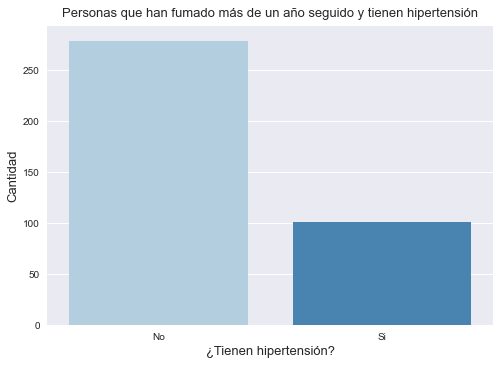

In [90]:
nuevos_Yes_HTA = df_6['HTA_new'] == 'Si'
mas2_fumadores = df_6['smoking_years'] >= 2
tratamiento_no = df_6['treatment'] == 'No'

df_nuevos_Yes_HTA =df_6[mas2_fumadores & tratamiento_no]

df_ball = df_nuevos_Yes_HTA[df_nuevos_Yes_HTA['HTA_new'].isin(['Si', 'No'])]
value_counts_all = df_ball['HTA_new'].value_counts()

value_counts_all

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('Cantidad', fontsize=13)
ax.set_xlabel('¿Tienen hipertensión?', fontsize=13)
ax.set_title('Personas que han fumado más de un año seguido y tienen hipertensión', fontsize=13, pad=10);


personas_que_fuman = value_counts_all

total_personasFumadoras_hipertension = personas_que_fuman[0] + personas_que_fuman[1]

porcentaje_personasFumadoras_hipertension = personas_que_fuman[1] * 100 / total_personasFumadoras_hipertension

print(f'El {porcentaje_personasFumadoras_hipertension:.0f}% de las personas que han fumado más de un año tienen hipertensión y no se han tratado médicamente')



No    1209
Si      92
Name: diabetes_mellitus, dtype: int64
El 7% de las personas que son diabéticas, tienen hipertensión


H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


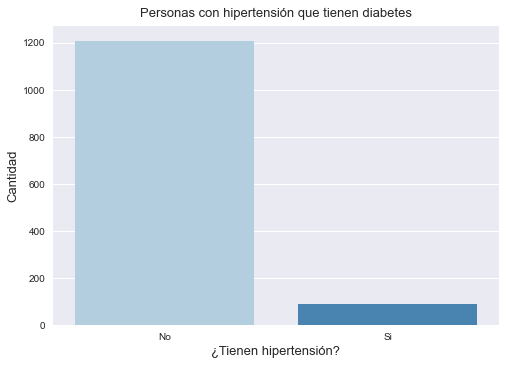

In [91]:
nuevos_Yes_HTA = df_6['HTA_new'] == 'Si'
df_nuevos_Yes_HTA =df_6[nuevos_Yes_HTA]

df_ball = df_nuevos_Yes_HTA[df_nuevos_Yes_HTA['diabetes_mellitus'].isin(['Si', 'No'])]
value_counts_all = df_ball['diabetes_mellitus'].value_counts()

value_counts_all

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('Cantidad', fontsize=13)
ax.set_xlabel('¿Tienen hipertensión?', fontsize=13)
ax.set_title('Personas con hipertensión que tienen diabetes', fontsize=13, pad=10);

personas_con_hipertension_diabetes = df_ball['diabetes_mellitus'].value_counts()

total_personasDiabeticas_hipertension = personas_con_hipertension_diabetes[0] + personas_con_hipertension_diabetes[1]

porcentaje_conHipertension_imcNormal = personas_con_hipertension_diabetes[1] * 100 / total_personasDiabeticas_hipertension

print(personas_con_hipertension_diabetes)

print(f'El {porcentaje_conHipertension_imcNormal:.0f}% de las personas que son diabéticas, tienen hipertensión')

El 34% de las personas que tienen un índice de masa corporal normal, tienen hipertensión


H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


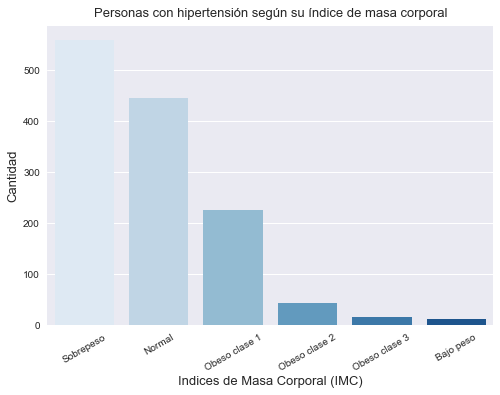

In [92]:
nuevos_Yes_HTA = df_6['HTA_new'] == 'Si'
df_nuevos_Yes_HTA =df_6[nuevos_Yes_HTA]

df_ball = df_nuevos_Yes_HTA[df_nuevos_Yes_HTA['BMI_cat'].isin(['Bajo peso', 'Normal', 'Sobrepeso', 'Obeso clase 1', 'Obeso clase 2', 'Obeso clase 3'])]
value_counts_all = df_ball['BMI_cat'].value_counts()

value_counts_all

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_ylabel('Cantidad', fontsize=13)
ax.set_xlabel('Indices de Masa Corporal (IMC)', fontsize=13)
ax.set_title('Personas con hipertensión según su índice de masa corporal', fontsize=13, pad=10);

personas_con_hipertension_imc = df_nuevos_Yes_HTA['BMI_cat'].value_counts()

total_personasIMC_hipertension = personas_con_hipertension_imc[0] + personas_con_hipertension_imc[1] + personas_con_hipertension_imc[2] + personas_con_hipertension_imc[3] + personas_con_hipertension_imc[4] + personas_con_hipertension_imc[5]

porcentaje_conHipertension_imcNormal = personas_con_hipertension_imc[1] * 100 / total_personasIMC_hipertension

 #print(personas_con_hipertension_imc)

print(f'El {porcentaje_conHipertension_imcNormal:.0f}% de las personas que tienen un índice de masa corporal normal, tienen hipertensión')

El 20% de las personas que cuidan de su salud, tienen hipertensión


H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


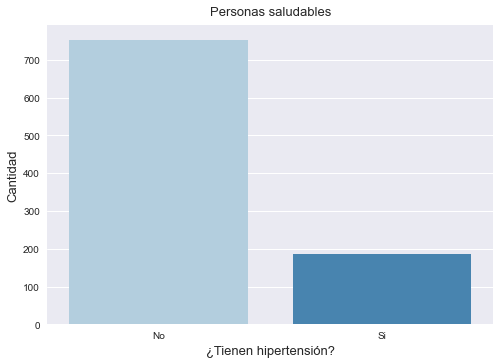

In [96]:
sin_diabetes = df_6['diabetes_mellitus'] == 'No'
no_fumador = df_6['smoking'] == 'No'
imc_normal = df_6['BMI_cat'] == 'Normal'
edad_65_menos = df_6['age_years'] < 65
actividad_fisica_si = df_6['physical_activity'] == 'Si'

df_sanos = df_6[sin_diabetes & no_fumador & imc_normal & edad_65_menos & actividad_fisica_si]

df_ball = df_sanos[df_sanos['HTA_new'].isin(['Si', 'No'])]
value_counts_all = df_ball['HTA_new'].value_counts()

value_counts_all

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('Cantidad', fontsize=13)
ax.set_xlabel('¿Tienen hipertensión?', fontsize=13)
ax.set_title('Personas saludables', fontsize=13, pad=10);

personasSanas_con_hipertension = df_sanos['HTA_new'].value_counts()

total_personasSanas_hipertension = personasSanas_con_hipertension[0] + personasSanas_con_hipertension[1]

porcentaje_conHipertension_sanas = personasSanas_con_hipertension[1] * 100 / total_personasSanas_hipertension

print(f'El {porcentaje_conHipertension_sanas:.0f}% de las personas que cuidan de su salud, tienen hipertensión')

No    1204
Si      97
Name: treatment, dtype: int64
El 93% de las personas que tienen hipertensión no se han tratado


H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


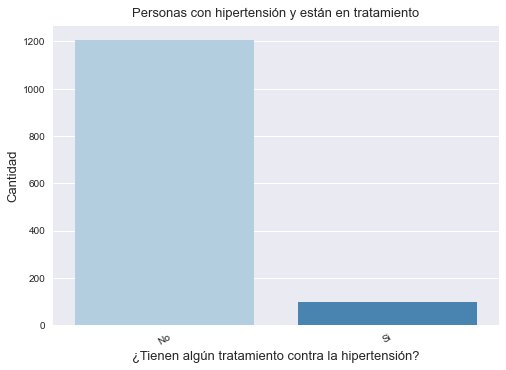

In [112]:
nuevos_Yes_HTA = df_6['HTA_new'] == 'Si'
df_nuevos_Yes_HTA =df_6[nuevos_Yes_HTA]
df_ball = df_nuevos_Yes_HTA[df_nuevos_Yes_HTA['treatment'].isin(['Si', 'No'])]
value_counts_all = df_ball['treatment'].value_counts()

value_counts_all

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_ylabel('Cantidad', fontsize=13)
ax.set_xlabel('¿Tienen algún tratamiento contra la hipertensión?', fontsize=13)


ax.set_title('Personas con hipertensión y están en tratamiento', fontsize=13, pad=10);

personas_con_hipertension_tratamiento = df_nuevos_Yes_HTA['treatment'].value_counts()

total_tratamiento_hipertension = personas_con_hipertension_tratamiento[0] + personas_con_hipertension_tratamiento[1]

porcentaje_conHipertension_sinTratamiento = personas_con_hipertension_tratamiento[0] * 100 / total_tratamiento_hipertension

print(f'El {porcentaje_conHipertension_sinTratamiento:.0f}% de las personas que tienen hipertensión no se han tratado')

In [95]:
def add_ageRange(df):
    if 18 <= df['age_years'] < 30:
        return 'Mayor o igual a 18, menor a 30'
    elif 30 <= df['age_years'] < 40:
        return 'Mayor o igual a 30, menor a 40'
    elif 40 <= df['age_years'] < 50:
        return 'Mayor o igual a 40, menor a 50'
    elif 50 <= df['age_years'] < 60:       
        return 'Mayor o igual a 50, menor a 60'
    elif 60 <= df['age_years']:
        return 'Mayor o igual a 60'
    # ['Menor de 18', 'Mayor o igual a 18, menor a 30', 'Mayor o igual a 30, menor a 40', 'Mayor o igual a 40, menor a 50', 'Mayor o igual a 50, menor a 60', 'Mayor o igual a 60']
df_6['age_range'] = df_6.apply(add_ageRange, axis = 1)

mayor_60 = df_6['age_range'] == 'Menor de 18'

HTA_new                           No   Si
age_range                                
Mayor o igual a 18, menor a 30  1105  256
Mayor o igual a 30, menor a 40   673  206
Mayor o igual a 40, menor a 50   748  308
Mayor o igual a 50, menor a 60   581  244
Mayor o igual a 60               720  287
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]
No: 81
Si: 19


C:\Users\emiro\AppData\Local\Temp/ipykernel_30056/2724416997.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['De 18 a 29 años', 'De 30 a 39 años', 'De 40 a 49 años', 'De 50 a 59 años', 'De 60 años para arriba'], fontsize=13, rotation = 45)


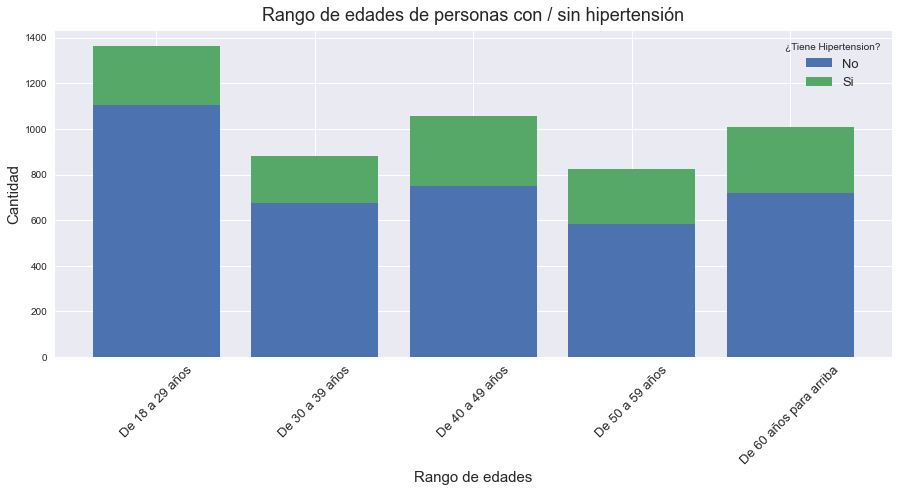

In [104]:

df_6range = df_6
df_6range['count'] = 1

df_ball_with_count = df_6range[df_6range['age_range'].isin(['Menor de 18', 'Mayor o igual a 18, menor a 30', 'Mayor o igual a 30, menor a 40', 'Mayor o igual a 40, menor a 50', 'Mayor o igual a 50, menor a 60', 'Mayor o igual a 60'])]
value_counts = df_ball_with_count.groupby(['age_range', 'HTA_new'])['count'].sum()

value_counts = value_counts.unstack(1)

print(value_counts)

plt.style.use('seaborn')

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot()
ax.set_title('Rango de edades de personas con / sin hipertensión', fontsize=18, pad=10);
ax.set_ylabel('Cantidad', fontsize=15)
ax.set_xlabel('Rango de edades', fontsize=15)

plt1 = ax.bar(value_counts.index, value_counts['No'], label='No')
plt2 = ax.bar(value_counts.index, value_counts['Si'], bottom=value_counts['No'])
print(ax.get_xticklabels())
ax.set_xticklabels(['De 18 a 29 años', 'De 30 a 39 años', 'De 40 a 49 años', 'De 50 a 59 años', 'De 60 años para arriba'], fontsize=13, rotation = 45)
plt.legend((plt1[0], plt2[0]), ('No', 'Si'),  title="¿Tiene Hipertension?", fontsize=13);

no = 1105
si = 256
no_por = no * 100 / (no + si)
si_por = si * 100 / (no + si)

print(f'No: {no_por:.0f}\nSi: {si_por:.0f}')



HTA_new    No   Si
region            
Costa     718  258
Jungla    228   62
Montaña  2881  981


C:\Users\emiro\AppData\Local\Temp/ipykernel_30056/271718917.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Costa', 'Jungla', 'Montaña'], fontsize=13)


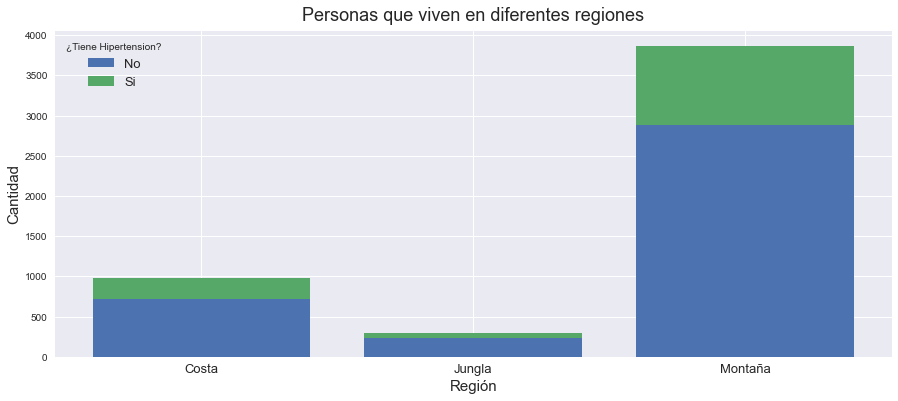

In [23]:


df_6region = df_6.replace({'region': {'Coast': 'Costa', 'Jungle': 'Jungla', 'Mountain': 'Montaña'}})
df_6region['count'] = 1

df_ball_with_count = df_6region[df_6region['region'].isin(['Costa', 'Jungla', 'Montaña'])]
value_counts = df_ball_with_count.groupby(['region', 'HTA_new'])['count'].sum()

value_counts = value_counts.unstack(1)

print(value_counts)

plt.style.use('seaborn')

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot()
ax.set_title('Personas que viven en diferentes regiones', fontsize=18, pad=10);
ax.set_ylabel('Cantidad', fontsize=15)
ax.set_xlabel('Región', fontsize=15)

plt1 = ax.bar(value_counts.index, value_counts['No'], label='No')
plt2 = ax.bar(value_counts.index, value_counts['Si'], bottom=value_counts['No'])
ax.set_xticklabels(['Costa', 'Jungla', 'Montaña'], fontsize=13)
#ax.set_xticklabels(['De 18 a 29 años', 'De 30 a 39 años', 'De 40 a 49 años', 'De 50 a 59 años', 'De 60 años para arriba'], fontsize=13, rotation = 45)
plt.legend((plt1[0], plt2[0]), ('No', 'Si'),  title="¿Tiene Hipertension?", fontsize=13);

HTA_new    No   Si
msnm              
2-4 mil  1684  855
< 2 mil  1203  351
> 4 mil   940   95


C:\Users\emiro\AppData\Local\Temp/ipykernel_30056/546719437.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Entre 2-4 mil M S.N.M.', 'Menos de 2 mil M S.N.M.', 'Más de 4 mil M S.N.M.'], fontsize=13)


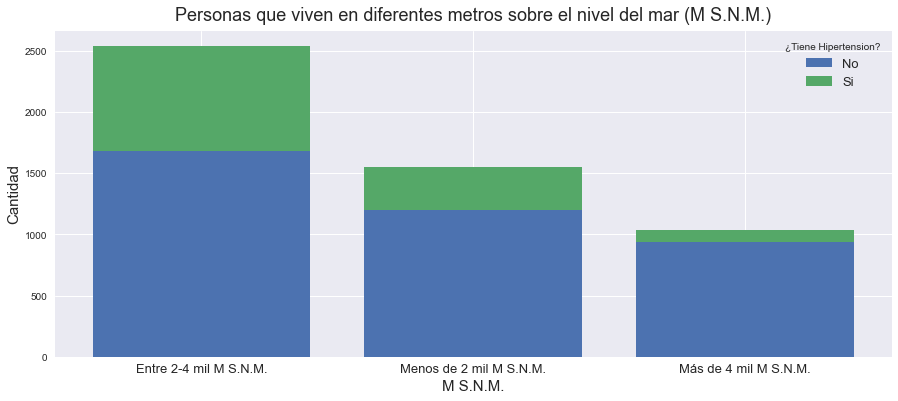

In [24]:
df_6msnm = df_6
df_6msnm['count'] = 1

df_ball_with_count = df_6region[df_6region['msnm'].isin(['2-4 mil', '< 2 mil', '> 4 mil'])]
value_counts = df_ball_with_count.groupby(['msnm', 'HTA_new'])['count'].sum()

value_counts = value_counts.unstack(1)

print(value_counts)

plt.style.use('seaborn')

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot()
ax.set_title('Personas que viven en diferentes metros sobre el nivel del mar (M S.N.M.)', fontsize=18, pad=10);
ax.set_ylabel('Cantidad', fontsize=15)
ax.set_xlabel('M S.N.M.', fontsize=15)

plt1 = ax.bar(value_counts.index, value_counts['No'], label='No')
plt2 = ax.bar(value_counts.index, value_counts['Si'], bottom=value_counts['No'])
ax.set_xticklabels(['Entre 2-4 mil M S.N.M.', 'Menos de 2 mil M S.N.M.', 'Más de 4 mil M S.N.M.'], fontsize=13)
plt.legend((plt1[0], plt2[0]), ('No', 'Si'),  title="¿Tiene Hipertension?", fontsize=13);

In [25]:
df_4.groupby('msnm').size()

msnm
2-4 mil    2604
< 2 mil    1586
> 4 mil    1057
dtype: int64

In [26]:
personas_anteriormente_HTA = df_6['hypertension_dx'] == 'Si'
personas_actualmente_sinHTA = df_6['HTA_new'] == 'No'

df_antesSi_ahoraNo_HTA =df_6[personas_anteriormente_HTA & personas_actualmente_sinHTA]
df_ball = df_antesSi_ahoraNo_HTA[df_antesSi_ahoraNo_HTA['HTA_new'].isin(['Si', 'No'])]
value_counts_all = df_ball['HTA_new'].value_counts()

personas_hipertension = df_antesSi_ahoraNo_HTA['HTA_new'].value_counts()

antes_HTA = df_6[personas_anteriormente_HTA]

porcentaje_conHipertension = personas_hipertension['No'] * 100 / antes_HTA['hypertension_dx'].count()

print(f'El {porcentaje_conHipertension:.0f}% de las personas que anteriormente tenían hipertensión, actualmente ya no la tienen')

El 66% de las personas que anteriormente tenían hipertensión, actualmente ya no la tienen


El 30% de las personas que tienen diabetes sin tratamiento padecen de hipertensión


H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


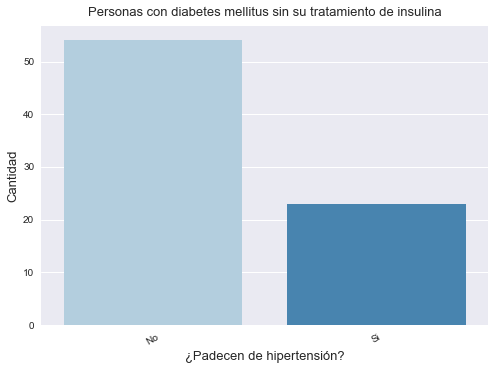

In [27]:
con_diabetes = df_6['diabetes_mellitus'] == 'Si'
sin_tratamiento_diabetes = df_6['dm_treatment'] == 'No'

df_diabetes_mal =df_6[con_diabetes & sin_tratamiento_diabetes]
df_ball = df_diabetes_mal[df_diabetes_mal['HTA_new'].isin(['Si', 'No'])]
value_counts_all = df_ball['HTA_new'].value_counts()

value_counts_all

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_ylabel('Cantidad', fontsize=13)
ax.set_xlabel('¿Padecen de hipertensión?', fontsize=13)


ax.set_title('Personas con diabetes mellitus sin su tratamiento de insulina', fontsize=13, pad=10);

personas_diabetes_mal = df_ball['HTA_new'].value_counts()

total_personas_diabetes_mal = personas_diabetes_mal[0] + personas_diabetes_mal[1]

porcentaje_conHipertension_sinTratamientoDM = personas_diabetes_mal[1] * 100 / total_personas_diabetes_mal

print(f'El {porcentaje_conHipertension_sinTratamientoDM:.0f}% de las personas que tienen diabetes sin tratamiento padecen de hipertensión')

## Columnas:

- city: Categórico nominal
- sex: Categórico nominal
- age_years: Numérico continuo
- systolic_bp: Numérico continuo
- diastolic_bp: Numérico continuo
- weight_kg: Numérico continuo
- height_cm: Numérico continuo
- body_mass_index: Numérico continuo
- diabetes_mellitus: Categórico ordinal
- dm_treatment: Categorico ordinal
- cv_diseases: Categorico ordinal
- cd_treatment: Categorico ordinal
- smoking: Categorico ordinal
- smoking_years: Numérico continuo
- hypertension_dx: Categórico ordinal
- hypertension_years: Numérico continuo
- hypertension_treatment: Categórico ordinal
- physical_activity: Categórico ordinal
- msnm: Categórico nominal
- region: Categórico nominal
- sist_old: Categórico nominal
- diast_old: Categórico nominal
- sist_new: Categórico nominal
- diast_new: Categórico nominal
- treatment: Categórico ordinal
- HTA_new: Categórico ordinal (Resultados)
- BMI_cat: Categórico ordinal
    
### Categóricos nominales: 8
### Categóricos ordinales: 9
### Numérico continuo: 8 

In [48]:
from sklearn.metrics import confusion_matrix

def calcular_precision(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluate_model(y_test, y_pred):
  matrix = confusion_matrix(y_test, y_pred)
  (TN, FP, FN, TP) = matrix.ravel()

  print(f"Precisión: {calcular_precision(TP, TN, FP, FN)}")
  print(f"Sensibilidad: {calcular_sensibilidad(TP, TN, FP, FN)}")
  print(f"Especificidad: {calcular_especificidad(TP, TN, FP, FN)}")

### Dividir los tipos de datos en diferentes dataframes incluyendo la categoría de los resultados

In [49]:
df_cat = df_6[{'city', 'sex', 'msnm', 'region', 'sist_old', 'diast_old', 'sist_new', 'diast_new','diabetes_mellitus', 'dm_treatment', 'cv_diseases', 'cd_treatment', 'smoking', 'hypertension_dx', 'hypertension_treatment', 'physical_activity', 'BMI_cat', 'age_range', 'HTA_new'}]
df_num = df_6[{'age_years', 'systolic_bp', 'diastolic_bp', 'weight_kg', 'height_cm', 'body_mass_index', 'smoking_years', 'hypertension_years', 'HTA_new'}]

### Matriz de correlación de los datos numéricos

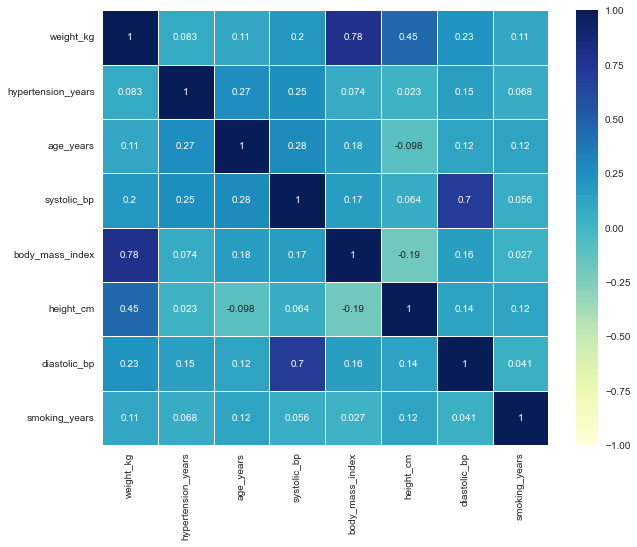

In [50]:
df_filtered = df_num
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

## Dataframe Numérico

### K-means

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import tree as treeClassifier

H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Años de hipertensión vs Edad del paciente'}, xlabel='hypertension_years', ylabel='age_years'>

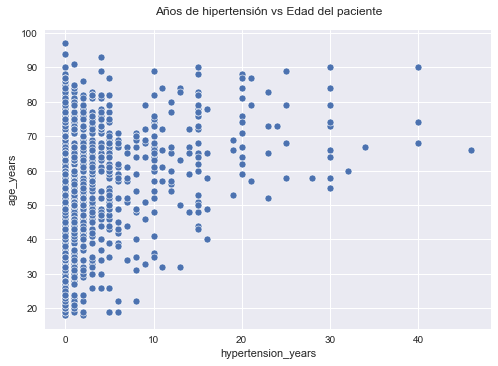

In [52]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Años de hipertensión vs Edad del paciente', pad=15)
sns.scatterplot(df_num['hypertension_years'], df_num['age_years'], ax=ax)

#### Método del codo

In [53]:
inertia_elkan = []
inertia_lloyd = []

for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, max_iter=300, algorithm='elkan')
    kmeans.fit(df_num[['hypertension_years', 'age_years']])
    inertia_elkan.append(kmeans.inertia_)
    
    kmeans = KMeans(n_clusters=n, max_iter=300, algorithm='lloyd')
    kmeans.fit(df_num[['hypertension_years', 'age_years']])
    inertia_lloyd.append(kmeans.inertia_)

H:\Program Files\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1323: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


Text(0.5, 1.0, 'Método del códo con Elkan')

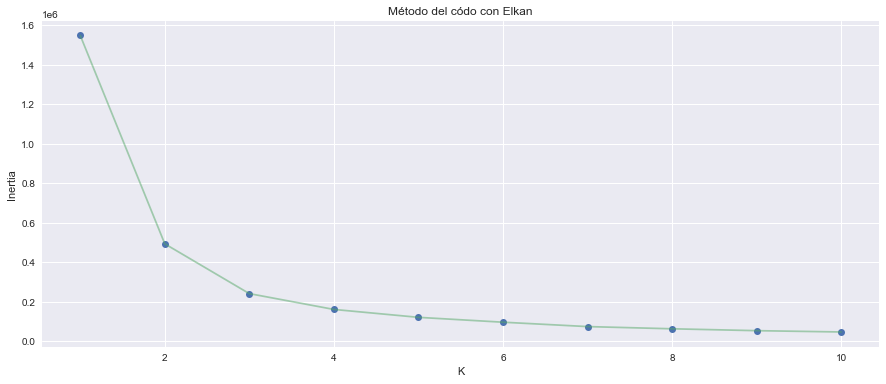

In [54]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia_elkan, 'o')
plt.plot(np.arange(1, 11), inertia_elkan, '-', alpha=0.5)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Método del códo con Elkan')

Text(0.5, 1.0, 'Método del códo con Lloyd')

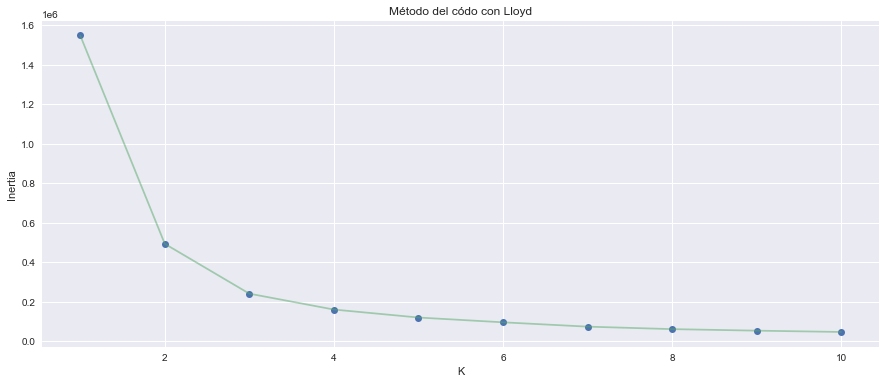

In [55]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia_lloyd, 'o')
plt.plot(np.arange(1, 11), inertia_lloyd, '-', alpha=0.5)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Método del códo con Lloyd')

In [56]:
k = 5

kmeans_elkan = KMeans(n_clusters=k, max_iter=300, algorithm='elkan')
kmeans_elkan.fit(df_num[['hypertension_years', 'age_years']])
centers_elkan = kmeans_elkan.cluster_centers_

kmeans_lloyd = KMeans(n_clusters=k, max_iter=300, algorithm='lloyd')
kmeans_lloyd.fit(df_num[['hypertension_years', 'age_years']])
centers_lloyd = kmeans_lloyd.cluster_centers_

H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


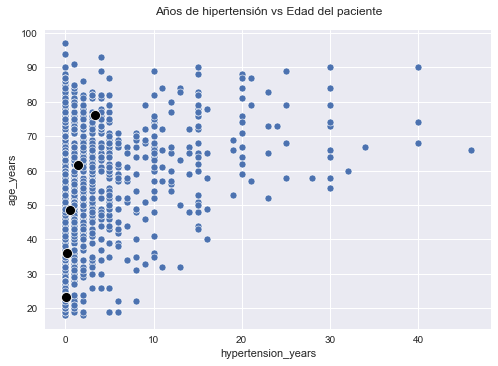

In [57]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Años de hipertensión vs Edad del paciente', pad=15)

sns.scatterplot(df_num['hypertension_years'], df_num['age_years'], ax=ax, palette='rainbow');
sns.scatterplot(centers_elkan[:, 0], centers_elkan[:, 1], ax=ax, s=100, color='black');

H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


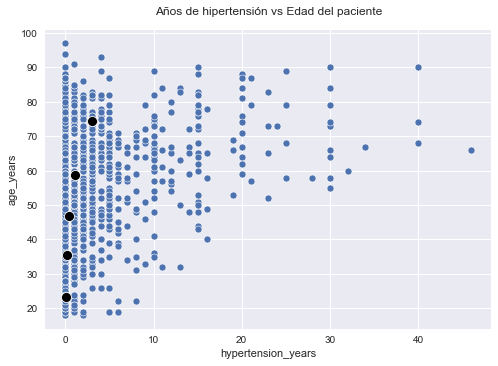

In [58]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Años de hipertensión vs Edad del paciente', pad=15)

sns.scatterplot(df_num['hypertension_years'], df_num['age_years'], ax=ax, palette='rainbow');
sns.scatterplot(centers_lloyd[:, 0], centers_lloyd[:, 1], ax=ax, s=100, color='black');

In [59]:
pred_elkan = kmeans_elkan.predict(df_num[['hypertension_years', 'age_years']])
pred_lloyd = kmeans_lloyd.predict(df_num[['hypertension_years', 'age_years']])

H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


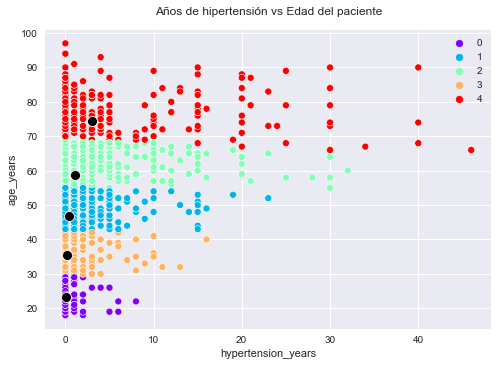

In [60]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Años de hipertensión vs Edad del paciente', pad=15)

sns.scatterplot(df_num['hypertension_years'], df_num['age_years'], ax=ax, hue=pred_elkan, palette='rainbow');
sns.scatterplot(centers_lloyd[:, 0], centers_lloyd[:, 1], ax=ax, s=100, color='black');

H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


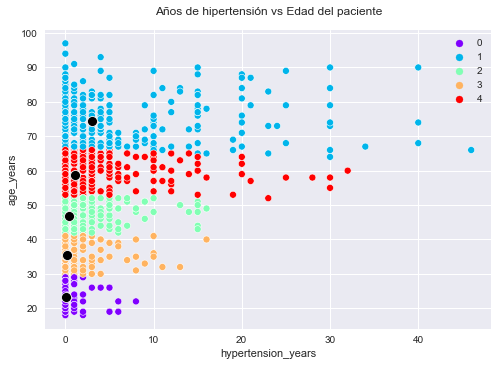

In [61]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Años de hipertensión vs Edad del paciente', pad=15)

sns.scatterplot(df_num['hypertension_years'], df_num['age_years'], ax=ax, hue=pred_lloyd, palette='rainbow');
sns.scatterplot(centers_lloyd[:, 0], centers_lloyd[:, 1], ax=ax, s=100, color='black');

### Regresión lineal

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn as sk

In [106]:
X = df_num[['age_years', 'systolic_bp', 'diastolic_bp', 'weight_kg', 'body_mass_index']]

y = pd.get_dummies(data=df_num['HTA_new'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [111]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print(f'lr.score: {lr.score(X_test, y_test)}\nChi-Squared: {mean_squared_error(y_test, y_predict)}')

lr.score: 0.19272293808670837
Chi-Squared: 0.1498451090362127


### Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

X = df_num.drop(columns='HTA_new')
y=df['HTA_new'].astype('category').cat.codes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

Precisión: 84.53541260558805
Sensibilidad: 76.7379679144385
Especificidad: 87.03862660944206
Chi-Squared: 0.15464587394411955


H:\Program Files\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Support Vector Machines (SVM)

In [66]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

H:\Program Files\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión: 87.00454840805718
Sensibilidad: 82.62032085561498
Especificidad: 88.41201716738198
Chi-Squared: 0.1299545159194282


In [67]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', degree=3)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

H:\Program Files\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión: 76.28330084470434
Sensibilidad: 27.27272727272727
Especificidad: 92.01716738197425
Chi-Squared: 0.23716699155295645


In [68]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', degree=3)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

H:\Program Files\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión: 83.9506172839506
Sensibilidad: 64.1711229946524
Especificidad: 90.30042918454936
Chi-Squared: 0.16049382716049382


## Dataframe Categórico

### Árboles de decisión

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

In [70]:
col_categorica = []
for column in df_6.columns:
    if df_6[column].dtype == object and len(df_6[column].unique()) < 50:
        col_categorica.append(column)


col_categorica.remove('treatment')

In [71]:
label_encoder = LabelEncoder()
for column in col_categorica:
    df_cat[column] = label_encoder.fit_transform(df_cat[column])
df_cat.head()

C:\Users\emiro\AppData\Local\Temp/ipykernel_30056/184295108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column] = label_encoder.fit_transform(df_cat[column])


,BMI_cat,hypertension_dx,physical_activity,city,region,dm_treatment,diast_old,sist_old,cv_diseases,diabetes_mellitus,HTA_new,smoking,diast_new,cd_treatment,hypertension_treatment,sist_new,msnm,age_range,sex
id,,,,,,,,,,,,,,,,,,,
1,5,1,0,7,0,0,5,4,0,0,1,0,2,0,2,1,1,4,1
4,5,0,1,7,0,0,5,3,0,0,0,1,2,0,0,0,1,4,0
6,5,1,0,7,0,0,4,0,1,0,0,0,0,1,2,2,1,4,0
7,2,1,0,7,0,0,5,4,0,0,1,0,2,0,2,1,1,4,0
8,5,0,0,7,0,0,3,0,0,0,0,0,0,0,0,2,1,4,0


In [72]:
X = df_cat.drop('HTA_new', axis=1)
y = df_cat.HTA_new

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

tree_cf = DecisionTreeClassifier()

tree_cf.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
y_pred = tree_cf.predict(X_test)



evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

Precisión: 100.0
Sensibilidad: 100.0
Especificidad: 100.0
Chi-Squared: 0.0


### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

Precisión: 100.0
Sensibilidad: 100.0
Especificidad: 100.0
Chi-Squared: 0.0


### Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

Precisión: 94.9317738791423
Sensibilidad: 88.3248730964467
Especificidad: 97.2052401746725
Chi-Squared: 0.050682261208576995


### Support Vector Machines (SVM)

In [77]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

Precisión: 98.76543209876543
Sensibilidad: 95.17766497461929
Especificidad: 100.0
Chi-Squared: 0.012345679012345678


In [78]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', degree=3)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

Precisión: 99.87004548408058
Sensibilidad: 99.49238578680203
Especificidad: 100.0
Chi-Squared: 0.001299545159194282


In [79]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', degree=3)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluate_model(y_test, y_pred)
print(f'Chi-Squared: {mean_squared_error(y_test, y_pred)}')

Precisión: 100.0
Sensibilidad: 100.0
Especificidad: 100.0
Chi-Squared: 0.0
